## SmoothGrad

In [13]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore

In [14]:
saliency = Saliency(model, clone=True)
def score_function(output, i):
    return (output[0][i],)

def visualize_smoothgrad(X):
    f, ax = plt.subplots(nrows=6, ncols=1, figsize=(20, 36))
    for i in range(6):
        # Generate saliency map
        saliency_map = saliency(
            lambda x: score_function(x, i),
            X,
            keepdims=True,
            smooth_samples=10,
            smooth_noise=0.01,
            normalize_map=False
        )
        print(np.max(saliency_map))
        ax[i].set_title(DIAGS[i], fontsize=16)
        ax[i].imshow(np.repeat(saliency_map[0], 100, axis=-1).T, vmax=0.01, cmap='Oranges', alpha=0.8)
        ax[i].set_yticks(ticks=[i * 100 + 50 for i in range(12)], labels=LEADS)
        
        for c in range(12):
            scale = 45 / np.max(np.abs(X[:, c]))
            ax[i].plot(X[:, c] * scale + 50 + 100 * c)
    plt.show()

4.0046854792308295e-06
8.321075711137382e-06
1.6449073481084043e-08
0.002984688588185236
1.3417013349226182e-07
2.9680606744190507e-13


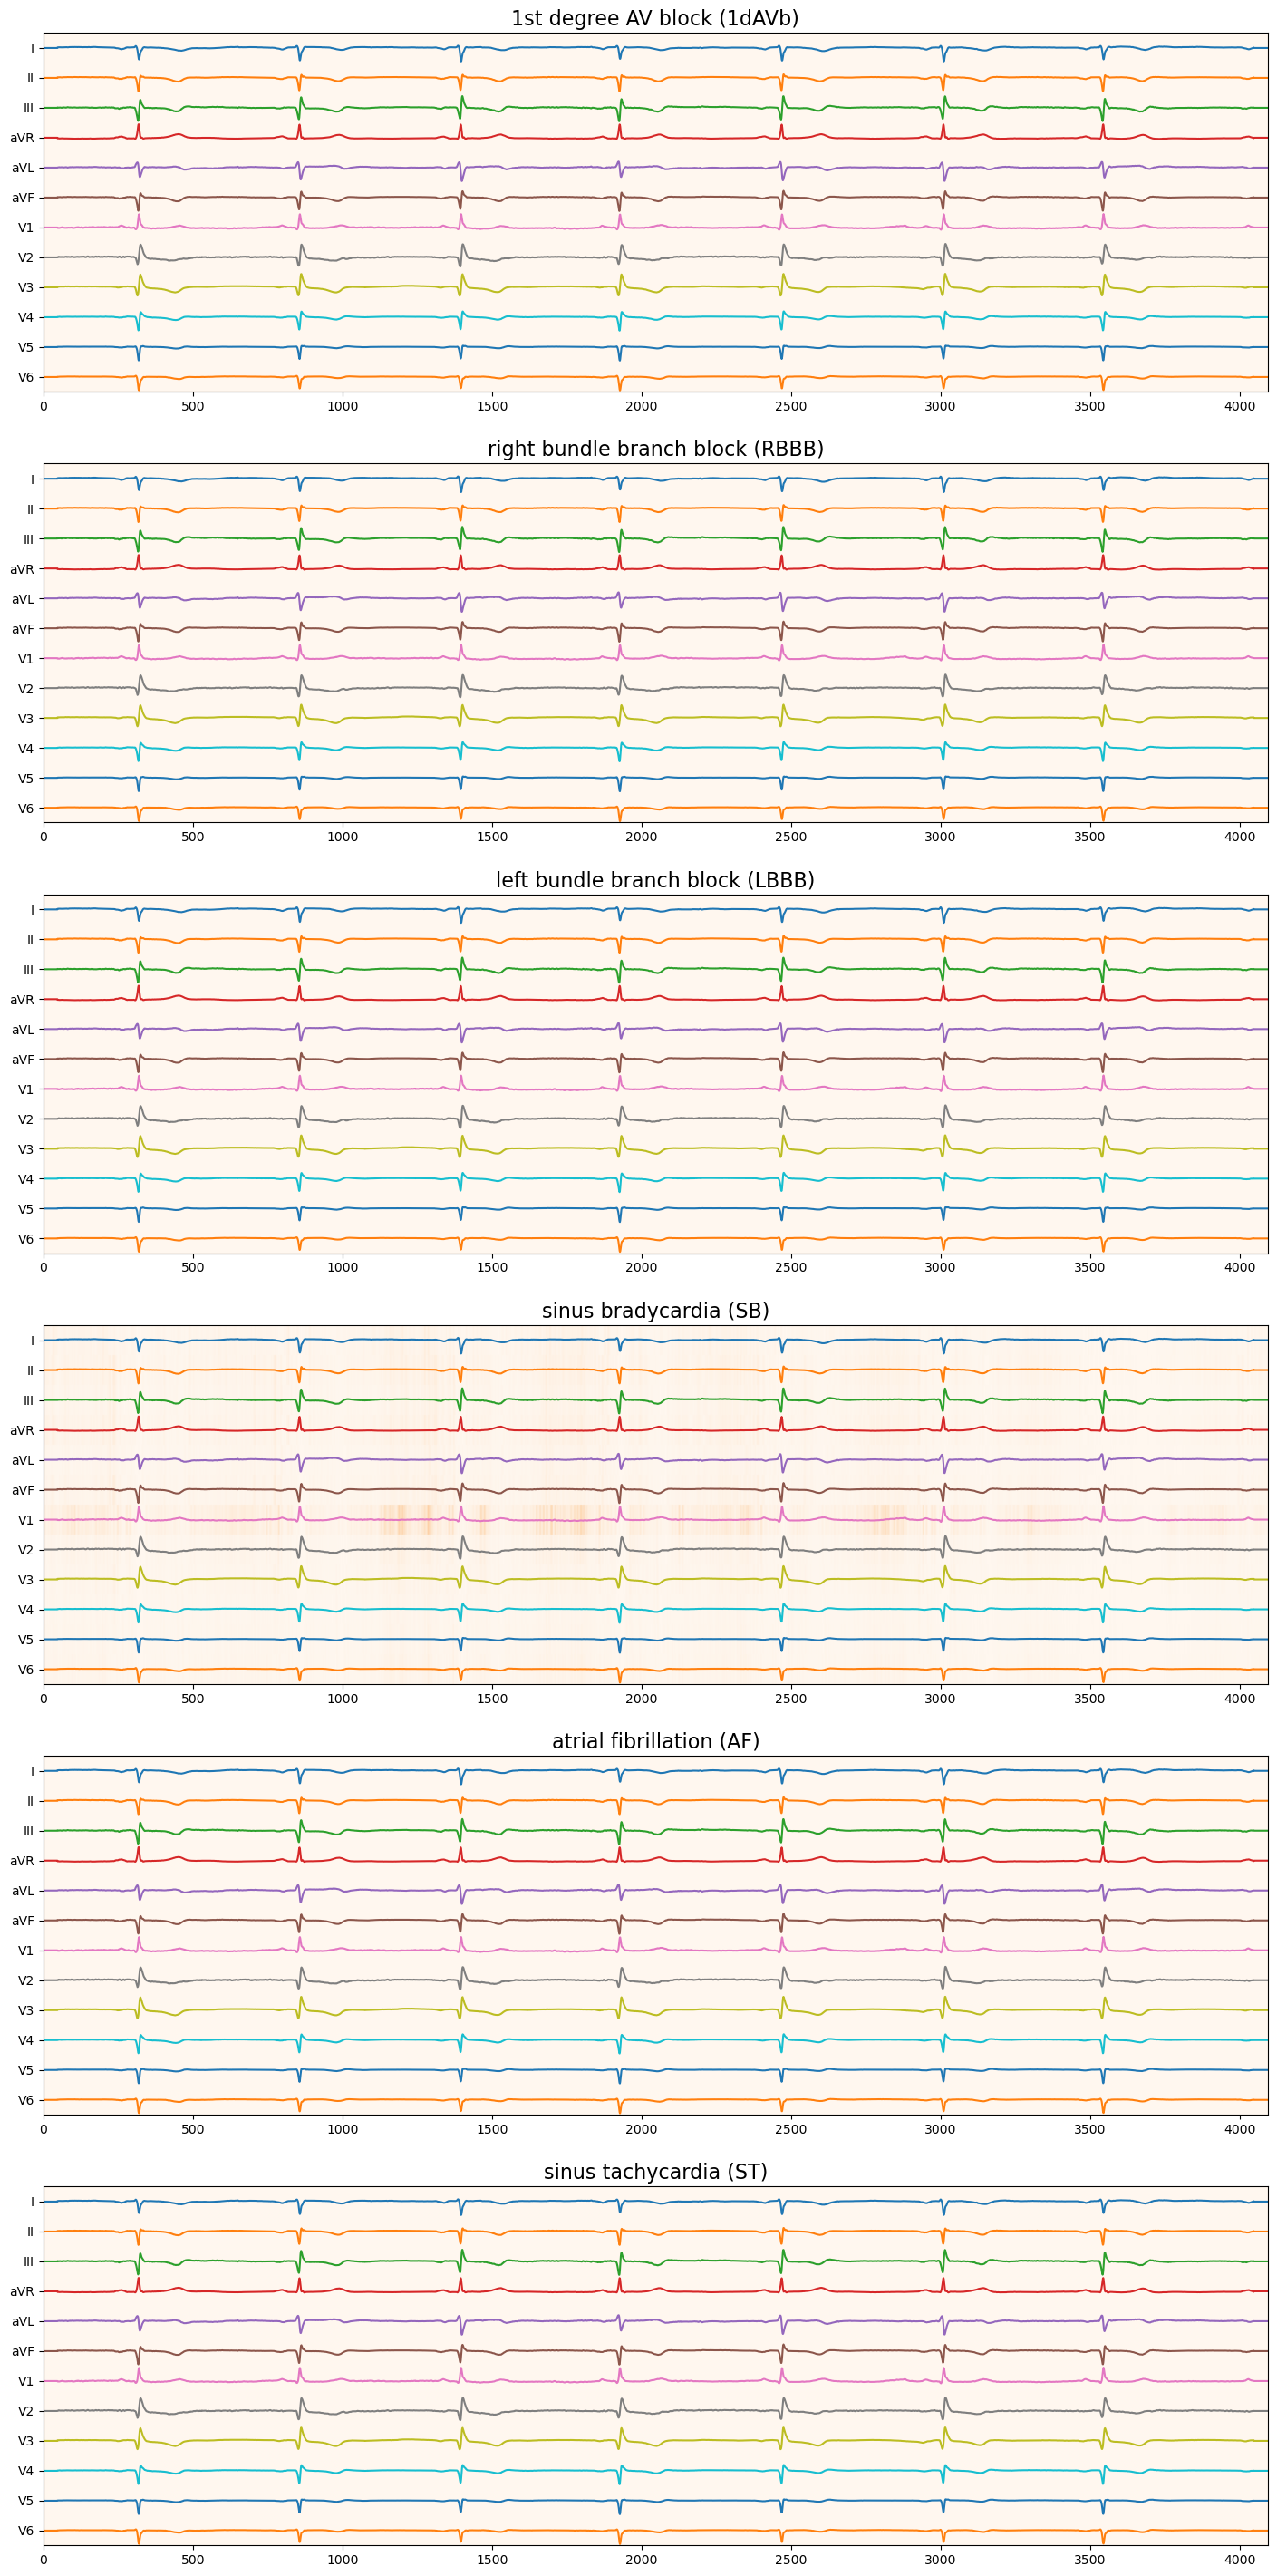

In [16]:
visualize_smoothgrad(X[195])

## GradCam++

In [15]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

In [16]:
gradcam = GradcamPlusPlus(model, clone=True)
def score_function(output, i):
    return (output[0][i],)

def visualize_gradcam(X):
    f, ax = plt.subplots(nrows=6, ncols=1, figsize=(20, 36))
    for i in range(6):
        # Generate saliency map
        gradcam_map = gradcam(
            lambda x: score_function(x, i),
            X,
            normalize_cam=False
        )
        print(np.max(gradcam_map))
        ax[i].set_title(DIAGS[i], fontsize=16)
        ax[i].imshow(np.repeat(gradcam_map[0], 100, axis=-1).T, vmax=0.05, cmap='Oranges')
        ax[i].set_yticks(ticks=[i * 100 + 50 for i in range(12)], labels=LEADS)
        
        for c in range(12):
            scale = 45 / np.max(np.abs(X[:, c]))
            ax[i].plot(X[:, c] * scale + 50 + 100 * c)
    plt.show()

3.7604906e-09
6.312459e-13
8.334675e-12
5.803191e-10
5.704633e-09
0.0011729253


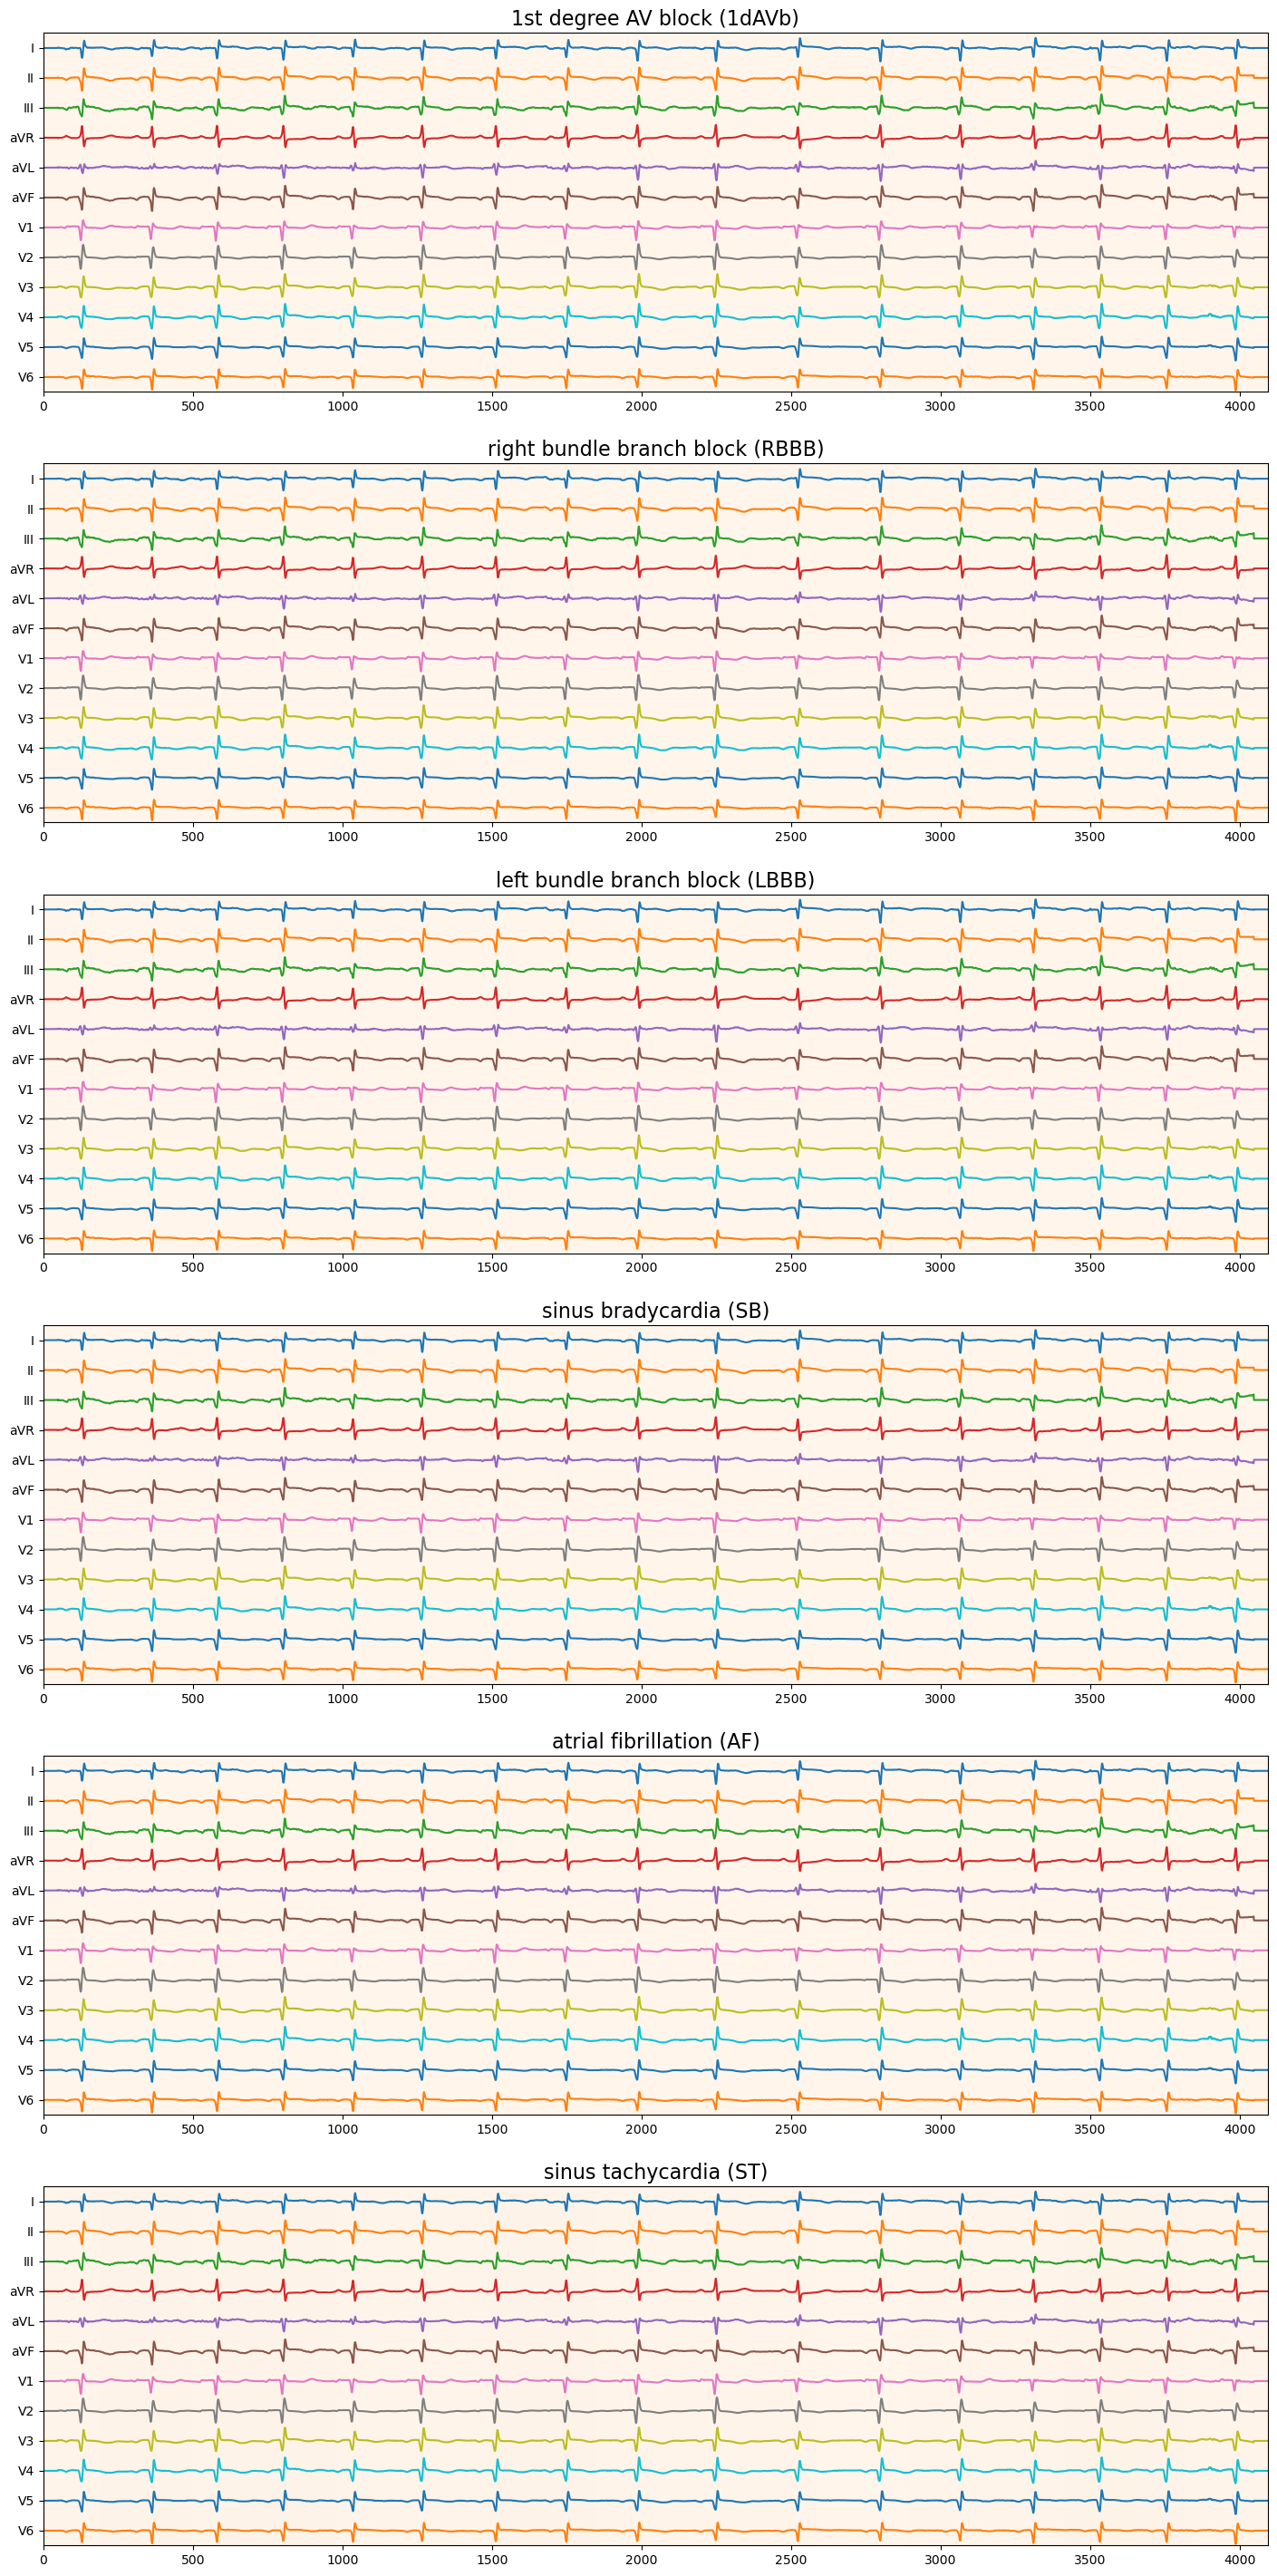

In [17]:
visualize_gradcam(X[7])

## ScoreCam

In [18]:
from tf_keras_vis.scorecam import Scorecam

In [19]:
scorecam = Scorecam(model, clone=True)
def score_function(output, i):
    return (output[0][i],)

def visualize_scorecam(X):
    f, ax = plt.subplots(nrows=6, ncols=1, figsize=(20, 36))
    for i in range(6):
        # Generate saliency map
        scorecam_map = scorecam(
            lambda x: score_function(x, i),
            X,
            normalize_cam=False
        )
        print(np.max(scorecam_map))
        ax[i].set_title(DIAGS[i], fontsize=16)
        ax[i].imshow(np.(scorecam_map[0], (4096, 1200)).T, vmax=0.05, cmap='Oranges')
        ax[i].set_yticks(ticks=[i * 100 + 50 for i in range(12)], labels=LEADS)
        
        for c in range(12):
            scale = 45 / np.max(np.abs(X[:, c]))
            ax[i].plot(X[:, c] * scale + 50 + 100 * c)
    plt.show()

In [12]:
# visualize_scorecam(X[4])

NameError: name 'visualize_scorecam' is not defined

## LayerCam

In [21]:
from tf_keras_vis.layercam import Layercam

In [22]:
layercam = Layercam(model, clone=True)
def score_function(output, i):
    return (output[0][i],)

def visualize_layercam(X):
    f, ax = plt.subplots(nrows=6, ncols=1, figsize=(20, 36))
    for i in range(6):
        # Generate saliency map
        layercam_map = layercam(
            lambda x: score_function(x, i),
            X,
            normalize_cam=False
        )
        print(np.max(layercam_map))
        ax[i].set_title(DIAGS[i], fontsize=16)
        ax[i].imshow(resize(layercam_map[0], (4096, 1200)).T, vmax=0.05, cmap='Oranges')
        ax[i].set_yticks(ticks=[i * 100 + 50 for i in range(12)], labels=LEADS)
        
        for c in range(12):
            scale = 45 / np.max(np.abs(X[:, c]))
            ax[i].plot(X[:, c] * scale + 50 + 100 * c)
    plt.show()

6.153118e-09
1.062532e-10
1.5631212e-11
1.131594e-09
1.3376513e-07
0.0010434326


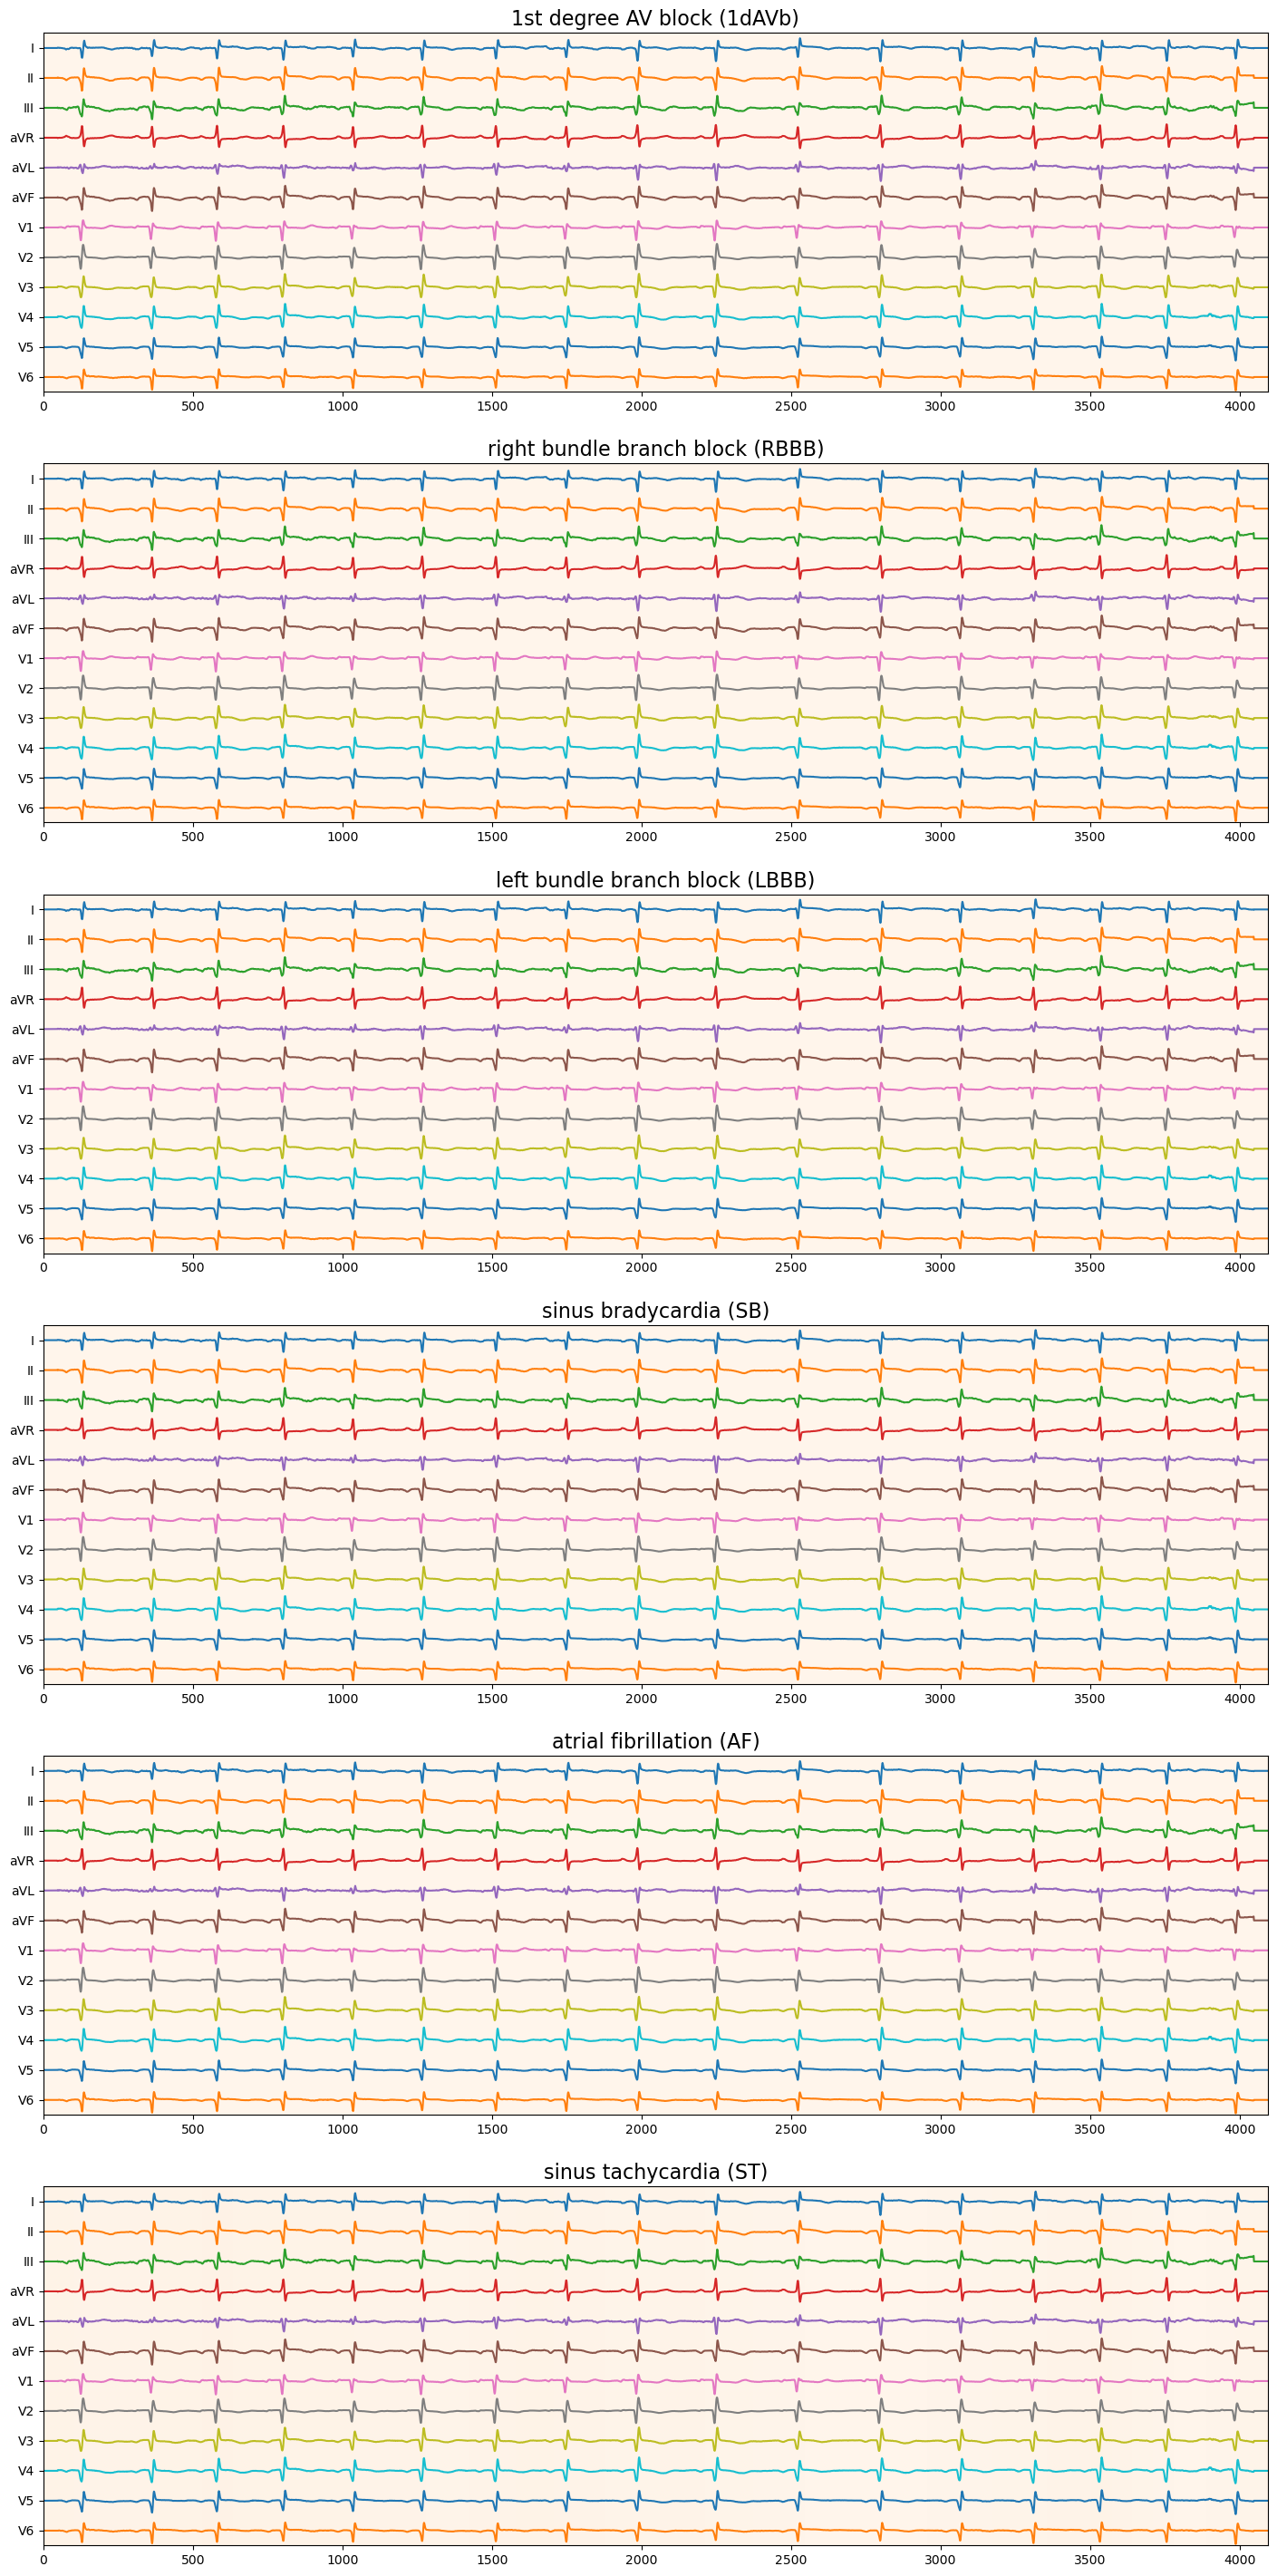

In [23]:
visualize_layercam(X[7])

In [134]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.transform import resize
from skimage.color import rgb2gray, gray2rgb

In [111]:
def visualize_explanation(X, explain_func, lead=None):
    exps, pred, vmin, vmax, cmap = explain_func(X)
    print(vmin, vmax)
    f, ax = plt.subplots(nrows=6, ncols=1, figsize=(20, 36))

    for label in range(6):
        # Generate saliency map
        exp = exps[label]
        
        
        if lead is None:
            img = np.swapaxes(np.repeat(exp, 100, axis=1), 0, 1)
            print(img.shape)
        else:
            exp0 = exp
            exp = exp[:, [lead], ...]
            print(exp.shape)
            img = np.swapaxes(np.repeat(exp, 1200, axis=1), 0, 1)
            print(img.shape)
            # return exp0, exp, img
        ax[label].imshow(img, vmin=vmin, vmax=vmax, cmap=cmap)
        
        ax[label].set_title(DIAGS[label] + " " + str(pred[0, label]) , fontsize=16)
        
        xticks = np.arange(0, 4096, 400)
        ax[label].set_xticks(ticks=xticks, labels=xticks // 400)
        ax[label].set_xlabel('time (s)')
        ax[label].set_ylabel('lead')
        ax[label].grid()
        
        
        if lead is None:
            for c in range(12):
                scale = -45 / np.max(np.abs(X[:, c]))
                ax[label].plot(X[:, c] * scale + 50 + 100 * c)
            ax[label].set_yticks(ticks=[50 + j * 100 for j in range(12)], labels=LEADS)
        else:
            ax[label].set_ylabel(LEADS[lead])
            scale = -550 / np.max(np.abs(X[:, lead]))
            ax[label].plot(X[:, lead] * scale + 600)
            ax[label].set_yticks([])
    
    plt.show()
    return exps

In [135]:
def visualize_lime(X, lead=None):
    def predict_img(X):
        # X_ecg = model.predict(X[..., 0], verbose=False)
        X_ecg = model.predict(rgb2gray(X), verbose=False)
        # return X_ecg
        # print(X_ecg.shape)
        res = np.array([dtree.predict_proba(X_ecg) for dtree in dtrees])
        res = res[...,1]
        return res.T
        
    def exp_func(X):
        # X_img = np.stack((X,) * 3, axis=-1)
        X_img = gray2rgb(X)
        explainer = lime_image.LimeImageExplainer()
        exp = explainer.explain_instance(X_img, predict_img, top_labels=6)
        labels = exp.local_exp.keys()
        pred = predict_img(np.array([X_img]))
        
        # print(pred.shape)

        exps = []
        for label in range(6):
            temp, mask = exp.get_image_and_mask(label, positive_only=False, hide_rest=True)
            # temp /= temp.max()
            temp = np.where(temp == 0, 1, temp)
            temp = temp / 2 + 0.5
            exps.append(temp)
        return exps, pred, None, None, None
    visualize_explanation(X, exp_func, lead=lead)

In [146]:
def visualize_shap(X, lead=None):
    def predict_img(X):
        X_ecg = model.predict(X[..., 0], verbose=False)
        # return X_ecg
        res = np.array([dtree.predict_proba(X_ecg) for dtree in dtrees])
        res = res[...,1]
        return res.T
    
    def explain_func(X):
        X_img = np.stack((X,) * 3, axis=-1)
        if len(X_img.shape) == 3:
            X_img = X_img[None, ...]

        masker = shap.maskers.Image("blur(128,128)", X_img[0].shape)
        explainer = shap.Explainer(predict_img, masker, output_names=DIAGS)

        shap_values = explainer(X_img, max_evals=5000, batch_size=50)
        labels = shap_values.output_names
        print(labels)
    
        norm = np.max(np.abs(shap_values.values[0, ...]))
        norm = max(norm, 1e-5)
        
        pred = predict_img(X_img)
        
        print(shap_values.values.shape)
        print(np.min(shap_values.values[0, ...]))
        
        exps = [shap_values.values[0,..., 0, i] for i in range(6)]
        
        return exps, pred, None, norm, 'Oranges'
  
    visualize_explanation(X, explain_func, lead=lead)



In [144]:
# def predict_img(X):
#     return model.predict(X[..., 0], verbose=False)
    # return model.predict(X, verbose=False)

def visualize_shap_deep(X):
    # X_img = np.stack((X,) * 3, axis=-1)
    X_img = X
    if len(X_img.shape) == 2:
        X_img = X_img[None, ...]
    # masker = shap.maskers.Image("blur(128,128)", X_img[0].shape)
    explainer = shap.DeepExplainer(model, X_ecg[np.random.choice(X_ecg.shape[0], 100, replace=False)])
    shap_values = explainer.shap_values(X_img)
    # shap_values = explainer(X_img, max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip)
    # labels = shap_values.output_names
    f, ax = plt.subplots(nrows=6, ncols=1, figsize=(20, 36))
    
    norm = np.max(np.abs(shap_values))
    print(norm)

    for i, label in enumerate(DIAGS):
        img = np.swapaxes(np.repeat(shap_values[i][0] , 100, axis=-1), 0, 1)
        ax[i].imshow(img, extent=(0, 4096, 0, 1200), cmap='Oranges', vmax = norm)
        
        ax[i].set_title(label, fontsize=16)
        
        xticks = np.arange(0, 4096, 400)
        ax[i].set_xticks(ticks=xticks, labels=xticks // 400)
        ax[i].set_yticks(ticks=[j * 100 + 50 for j in range(12)], labels=LEADS)
        ax[i].set_xlabel('time (s)')
        ax[i].set_ylabel('lead')
        
        for c in range(12):
            scale = 45 / np.max(np.abs(X[:, c]))
            ax[i].plot(X[:, c] * scale + 50 + 100 * c)
        ax[i].grid()
    plt.show()